# Context:
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.

# Attribute Information:
● All the features are geometric features extracted from the silhouette.
● All are numeric in nature

# Objective:
Apply dimensionality reduction technique – PCA and train a model using
principle components instead of training the model using just the raw data.

# Q1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm 

In [102]:
#Import all the necessary modules

import numpy as np  
import pandas as pd  

import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics  
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [103]:
#load the csv file vehicle.csv
df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [104]:
#Size of the data
df.shape

(846, 19)

In [105]:
# Data types of the fields
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [106]:
# Fields info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [107]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Obervations: 
- Data has total 19 fields where 18 are numeric and one is object type. 
- Not all the fields has same row count. Some fields like circularity, distance_circularity,radius_ratio e.t.c has null values.
- Class is a categorical field.


In [108]:
#List all the rows having missing value in any of the single or multiple columns
missing_values_cols=df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)][missing_values_cols].head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5           NaN                 106.0         172.0                  50.0   
9          44.0                  98.0           NaN                  62.0   
19         56.0                 100.0         215.0                   NaN   
35         46.0                   NaN         172.0                  67.0   
66         43.0                  68.0         125.0                  57.0   

    scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5           255.0           26.0                    28.0            280.0   
9           183.0           36.0                    22.0            202.0   
19          208.0           32.0                    24.0            227.0   
35          157.0           43.0                    20.0            170.0   
66          149.0           46.0                    19.0            169.0   

    scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
5               957.0                      264.0                         85.0   
9               505.0                      152.0                         64.0   
19              651.0                      223.0                         74.0   
35              363.0                      184.0                         67.0   
66              323.0                      172.0                          NaN   

    skewness_about  skewness_about.1  skewness_about.2  
5              5.0               9.0             181.0  
9              4.0              14.0             195.0  
19             6.0               5.0             186.0  
35            17.0               7.0             192.0  
66             NaN              18.0             179.0

In [109]:
df[df.isnull().any(axis=1)][missing_values_cols].shape


(33, 14)

### Note:

There are total 33 rows with missng values in one or more of 14 columns.

In [110]:
#display 5 point summary
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### Univariate Distribution & Analysis using Histograms and the Boxplots

In [111]:
# Distribution of the data group by class variable
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

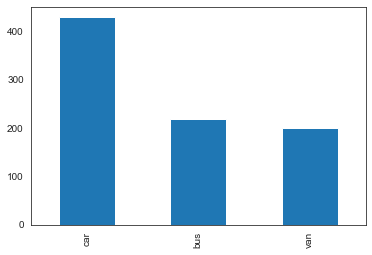

In [112]:
pd.value_counts(df["class"]).plot(kind="bar")

__Note__: Cars are almost double in number as compared to bus and van. van is least in number

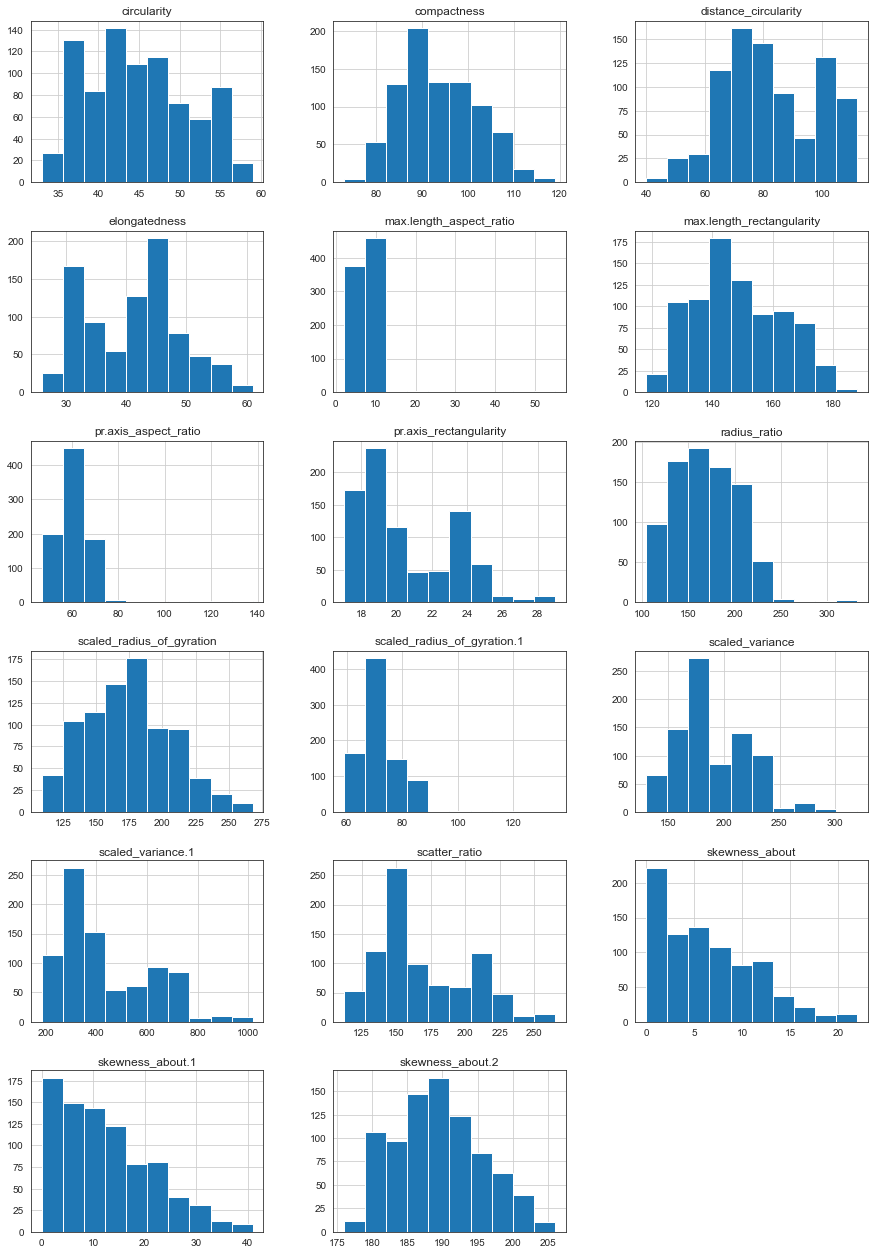

In [113]:
columns = list(df.drop(["class"],axis=1))[0:-1] 
df[columns].hist(bins=10, figsize=(15,30), layout=(8,3)); 

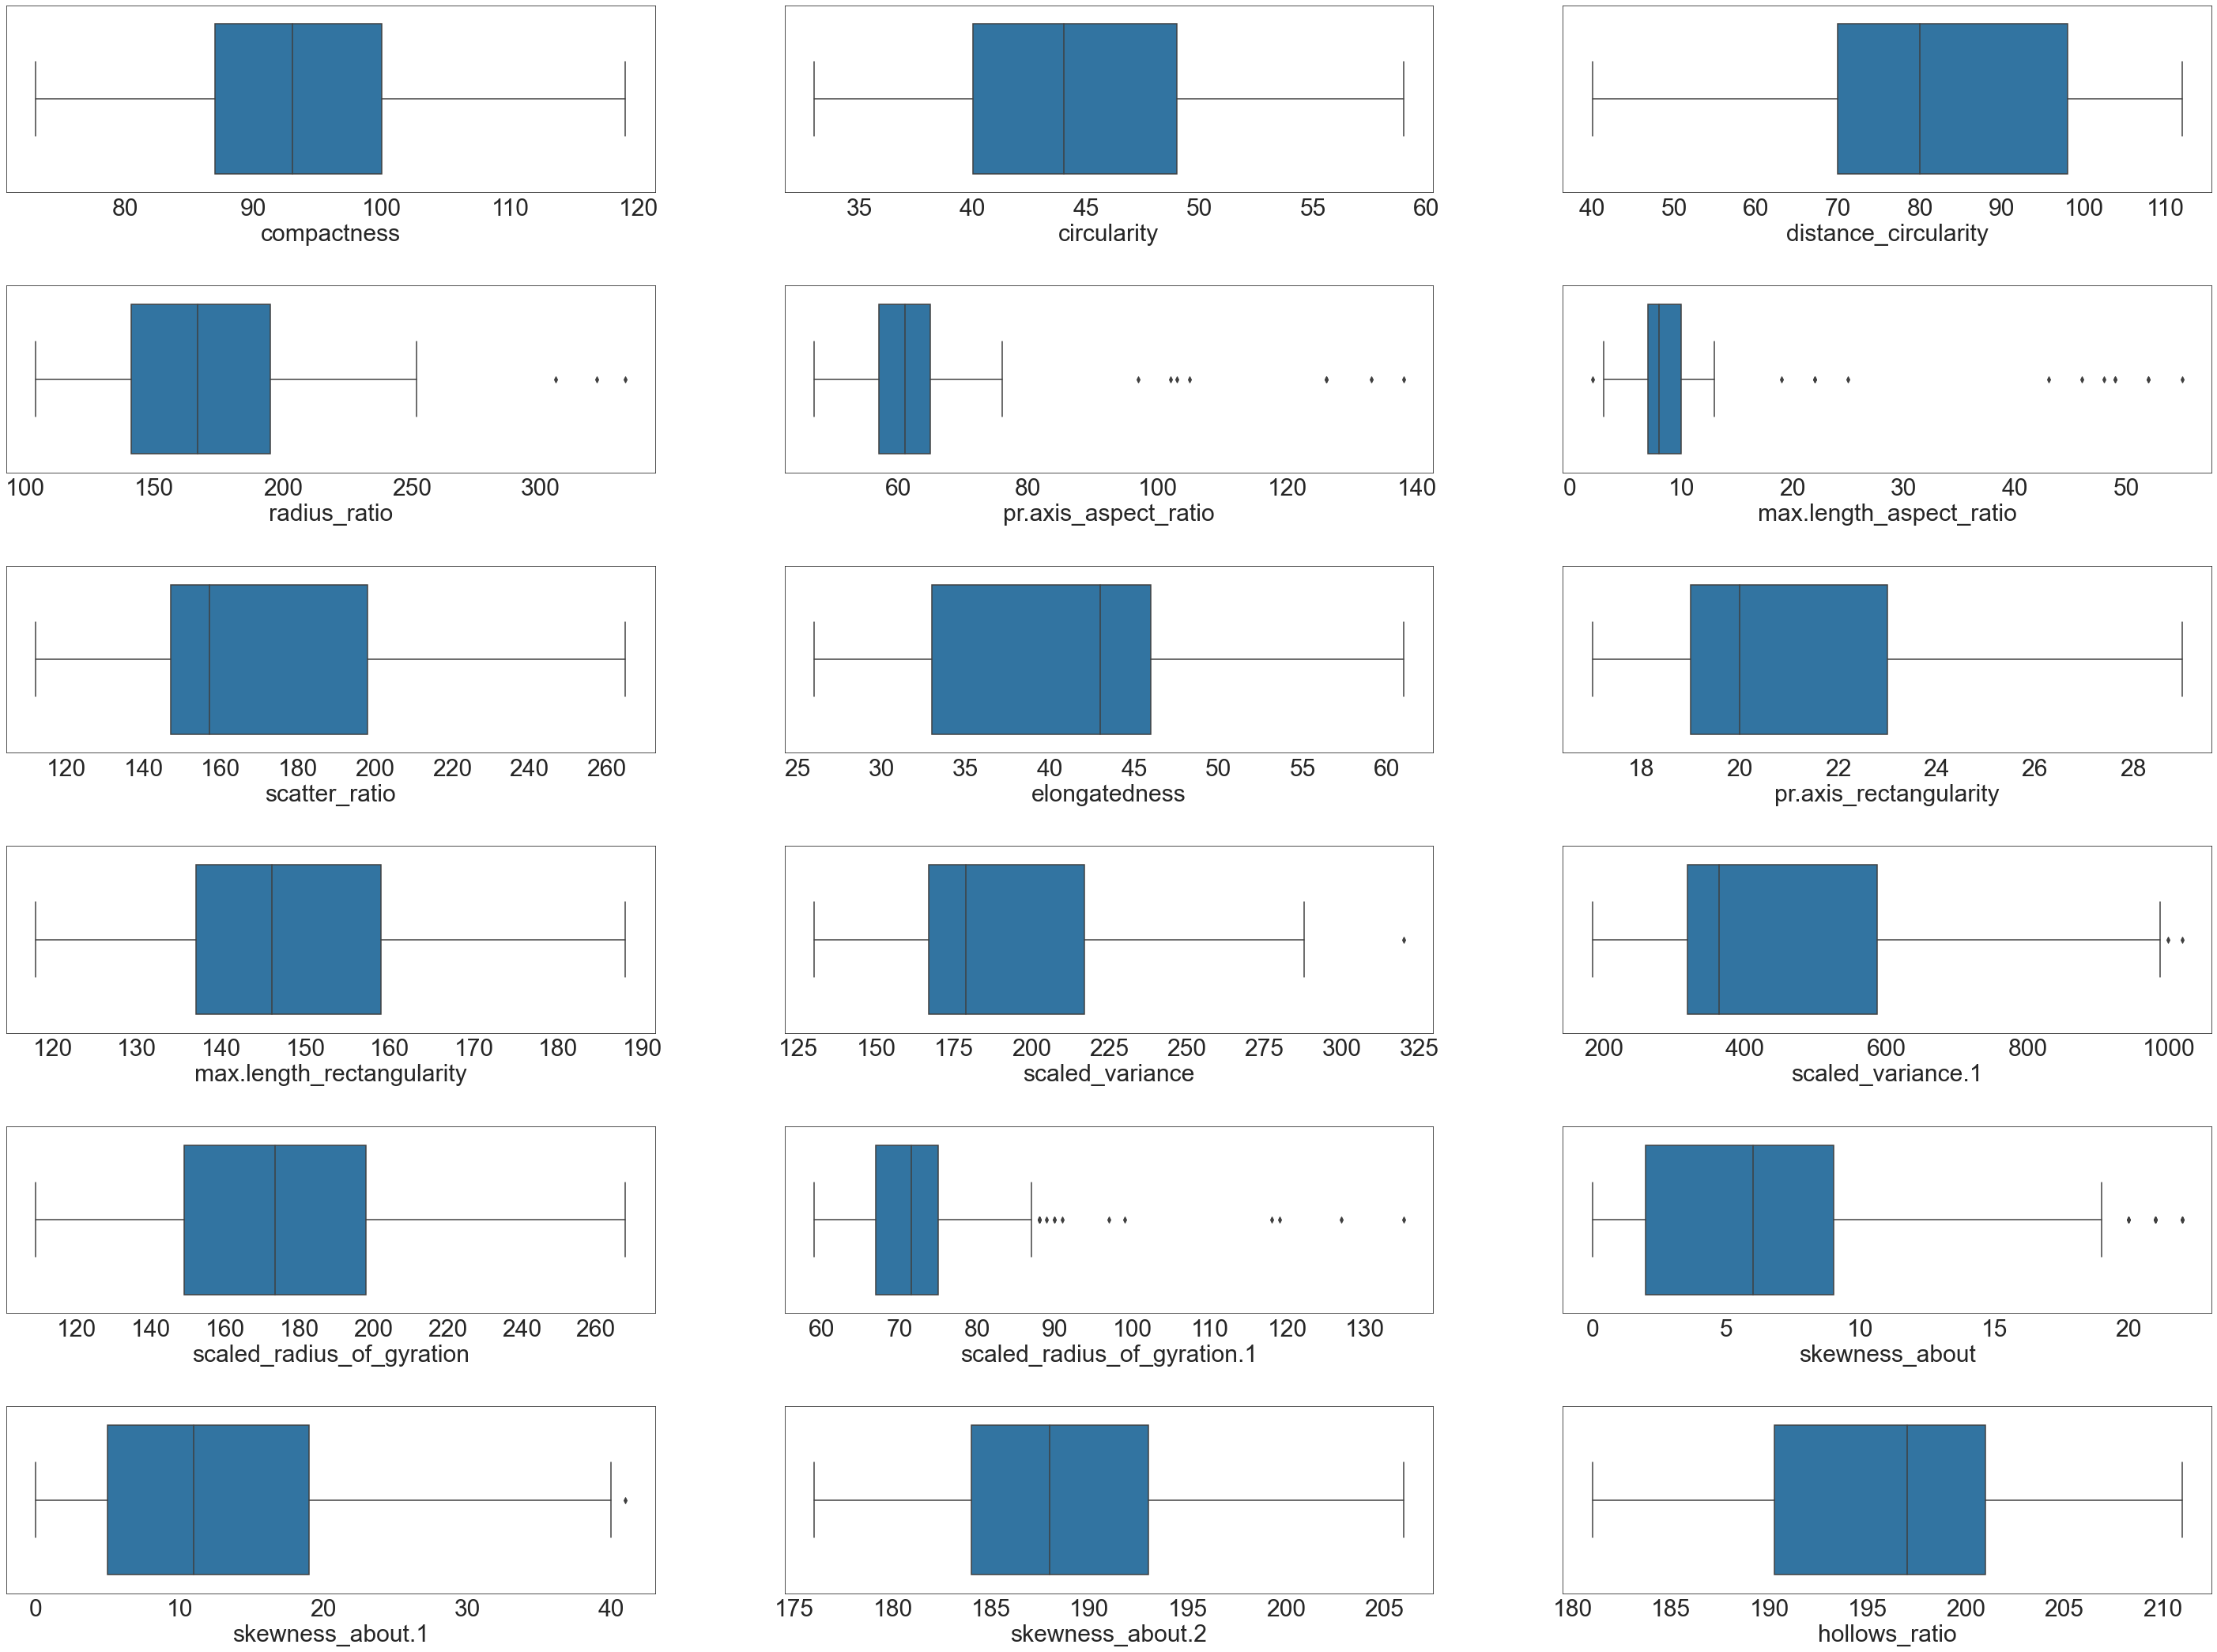

In [114]:
plt.figure(figsize= (50,50))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
i=1
for feature in df.drop(["class"],axis=1).columns: # Loop through all columns in the dataframe
    plt.subplot(8,3,i)
    b = sns.boxplot(x= df[feature])
    b.set_xlabel(feature,fontsize=30)
    b.tick_params(labelsize=30)
    i=i+1

#### Observations:

- Seems compactness and circularity are somewhat normally distributed and no outliers found.
- distance_circularity is right skewed and no outliers.
- radius_ratio is left skewed and found some outliers.
- pr.axis_aspect_ratio	most of the data in between 10 to 80. Outliers are there.
- max.length_aspect_ratio most of the data in between 3 to 15. Outliers are there.
- scatter_ratio median is left skewed. No outliers.
- elongatedness most of the data is below 45. No outliers.
- pr.axis_rectangularity is left skewed but no outliers.
- max.length_rectangularity seems somewhat normally distributed with no outliers.
- scaled_variance is left skewed with little bit of outliers.
- scaled_variance.1 is left skewed and has outliers.
- scaled_radius_of_gyration is somewhat normally distributed and no outliers.
- scaled_radius_of_gyration.1 is left skewed and most of the data between 65 and 75. Contains many outliers.
- skewness_about is left skewed and has few outliers.
- skewness_about.1 is left skewed and has few outliers.
- skewness_about.2 seems somewhat normally distributed with no outliers.
- hollows_ratio seems normally distributed without outliers.
- Many columns have long tails indicating outliers.
- Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship
- Many features show high correlation indicating that we need to drop multiple features- we will use PCA for the same

In [115]:
# Let us take logaritmic transform for the below attributes which has high outliers.
# pr.axis_aspect_ratio
# max.length_aspect_ratio
# scaled_radius_of_gyration.1
df['pr.axis_aspect_ratio'] = np.log(df['pr.axis_aspect_ratio'])
df['max.length_aspect_ratio'] = np.log(df['max.length_aspect_ratio'])
df['scaled_radius_of_gyration.1'] = np.log(df['scaled_radius_of_gyration.1'])

df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              4.276666                 2.302585          162.0   
1              4.043051                 2.197225          149.0   
2              4.189655                 2.302585          207.0   
3              4.143135                 2.197225          144.0   
4              4.634729                 3.951244          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     4.248495             6.0              16.0   
1                     4.276666             9.0              14.0   
2                     4.290459            14.0               9.0   
3                     4.143135             6.0              10.0   
4                     4.844187             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [116]:
# Now we will impute the missing valkues with mean of respective fields
df.fillna(df.median(),axis=0,inplace=True)

In [117]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Null values are successfully replaced with the median values of each field.


In [118]:
##Scale the data using zscore
df_scaled =df.drop(labels='class', axis=1).apply(zscore)
df_scaled['class']=df['class']
df_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.449217                 0.669362      -0.207598   
1             -0.647775                 0.352541      -0.599423   
2              0.668179                 0.669362       1.148719   
3              0.250602                 0.352541      -0.750125   
4              4.663290                 5.626910      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.306641       -0.073812          0.380870   
1                    -0.013736        0.538390          0.156798   
2                     0.129679        1.558727         -0.403383   
3                    -1.402119       -0.073812         -0.291347   
4                     5.887022        0.538390         -0.179311   

   skewness_about.2  hollows_ratio class  
0         -0.312012       0.183957   van  
1          0.013265       0.452977   van  
2         -0.149374       0.049447   car  
3          1.639649       1.529056   van  
4         -1.450481      -1.699181   bus

### Note:
 
 * Now we can use this data in any unsupevised learing algorithms just by dropping the class variable. We have done the sclaing of the data and logerithemic transformation for the variables which has higher outliers and inputed medians in the place of null values.

# Q2.Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why 

### Bivarient Distribution & Analysis of corelation using pair plots and the heatmap

In [119]:
df_scaled.corr(method='kendall')

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.462461              0.579085   
circularity                     0.462461     1.000000              0.569408   
distance_circularity            0.579085     0.569408              1.000000   
radius_ratio                    0.550356     0.446929              0.605946   
pr.axis_aspect_ratio            0.169004     0.165388              0.193670   
max.length_aspect_ratio         0.359309     0.407631              0.488755   
scatter_ratio                   0.578633     0.645576              0.716605   
elongatedness                  -0.606992    -0.640850             -0.723885   
pr.axis_rectangularity          0.612264     0.678406              0.753699   
max.length_rectangularity       0.464263     0.864565              0.552882   
scaled_variance                 0.545837     0.598784              0.685552   
scaled_variance.1               0.584062     0.635571              0.713186   
scaled_radius_of_gyration       0.371722     0.807057              0.483072   
scaled_radius_of_gyration.1    -0.193927     0.066537             -0.149354   
skewness_about                  0.128514     0.100619              0.065705   
skewness_about.1                0.103902    -0.022009              0.176097   
skewness_about.2                0.247947    -0.066386              0.121488   
hollows_ratio                   0.287655     0.026721              0.238263   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.550356              0.169004   
circularity                      0.446929              0.165388   
distance_circularity             0.605946              0.193670   
radius_ratio                     1.000000              0.513699   
pr.axis_aspect_ratio             0.513699              1.000000   
max.length_aspect_ratio          0.355496              0.154931   
scatter_ratio                    0.603823              0.192927   
elongatedness                   -0.652554             -0.228718   
pr.axis_rectangularity           0.616467              0.188358   
max.length_rectangularity        0.400847              0.127034   
scaled_variance                  0.637563              0.232931   
scaled_variance.1                0.619957              0.208743   
scaled_radius_of_gyration        0.373187              0.130854   
scaled_radius_of_gyration.1     -0.246047             -0.170250   
skewness_about                   0.026887             -0.034958   
skewness_about.1                 0.110094             -0.016210   
skewness_about.2                 0.304631              0.278494   
hollows_ratio                    0.346779              0.273606   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.359309       0.578633   
circularity                                 0.407631       0.645576   
distance_circularity                        0.488755       0.716605   
radius_ratio                                0.355496       0.603823   
pr.axis_aspect_ratio                        0.154931       0.192927   
max.length_aspect_ratio                     1.000000       0.390855   
scatter_ratio                               0.390855       1.000000   
elongatedness                              -0.375376      -0.946256   
pr.axis_rectangularity                      0.418916       0.921104   
max.length_rectangularity                   0.470371       0.604559   
scaled_variance                             0.358181       0.852234   
scaled_variance.1                           0.378573       0.968846   
scaled_radius_of_gyration                   0.302308       0.563414   
scaled_radius_of_gyration.1                -0.177602      -0.022784   
skewness_about                              0.044071       0.036294   
skewness_about.1                            0.097032       0.138610   
skewness_about.2                            0.

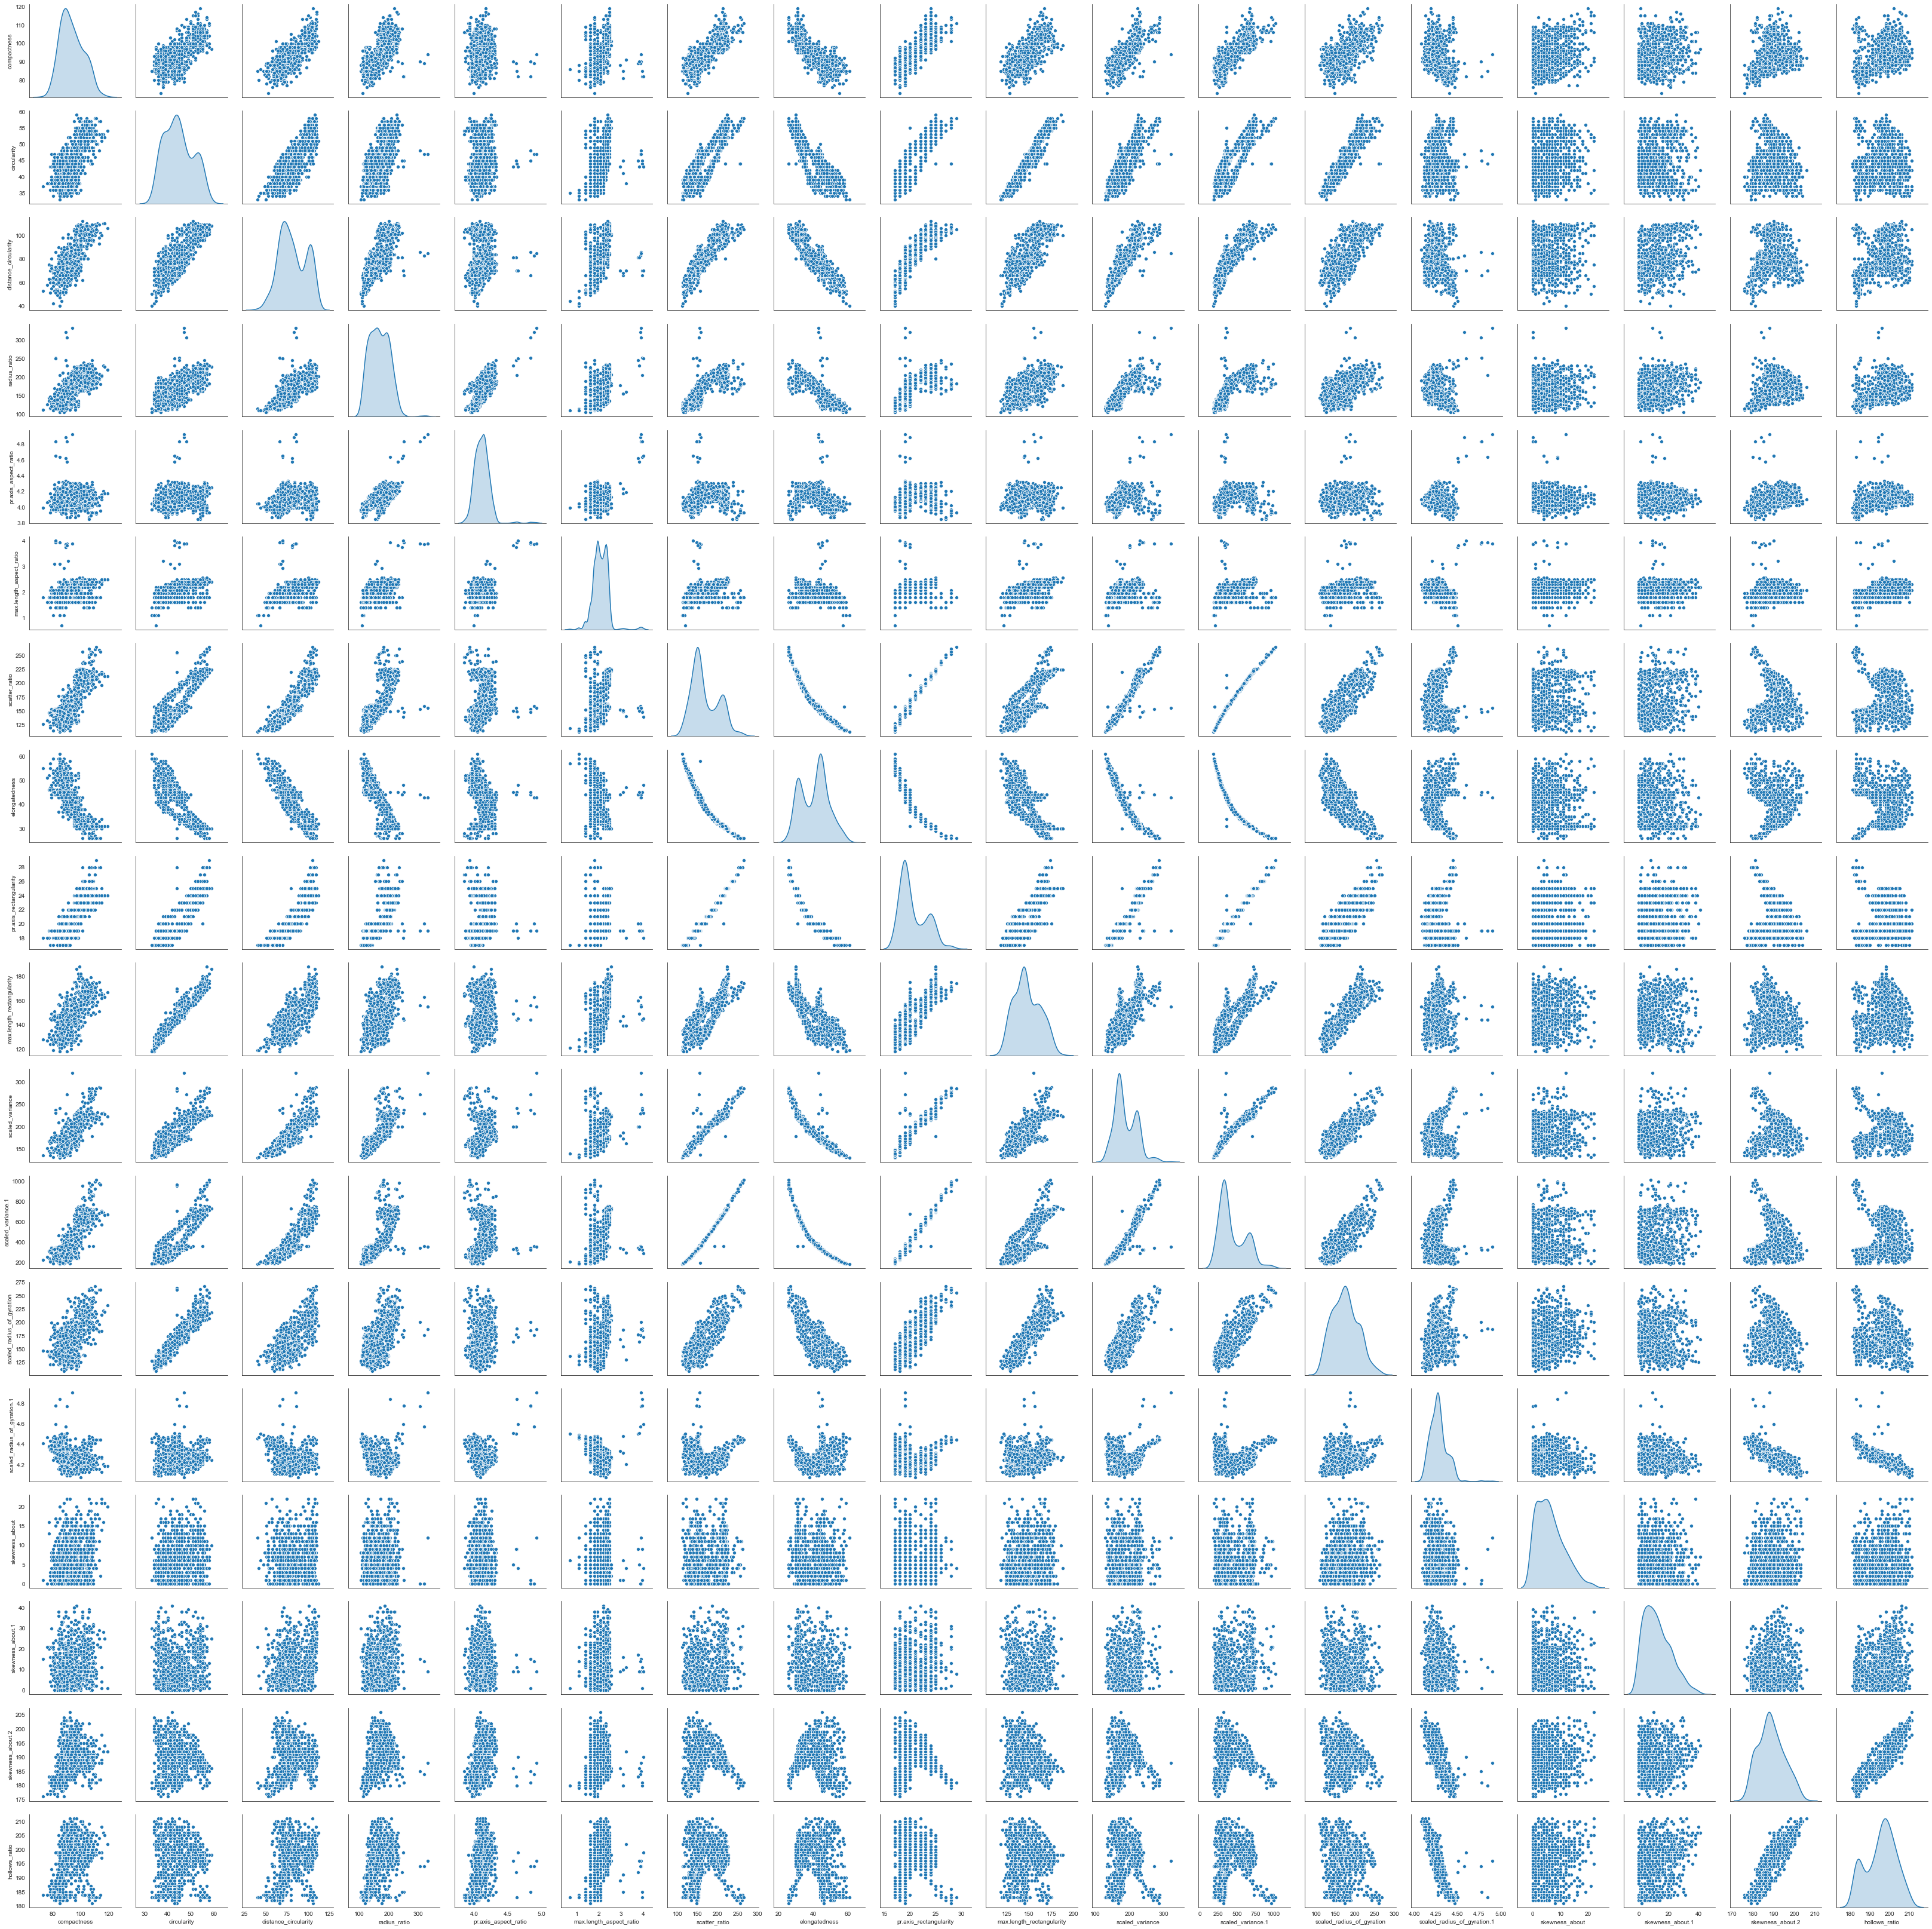

In [120]:
sns.pairplot(df,diag_kind='kde')

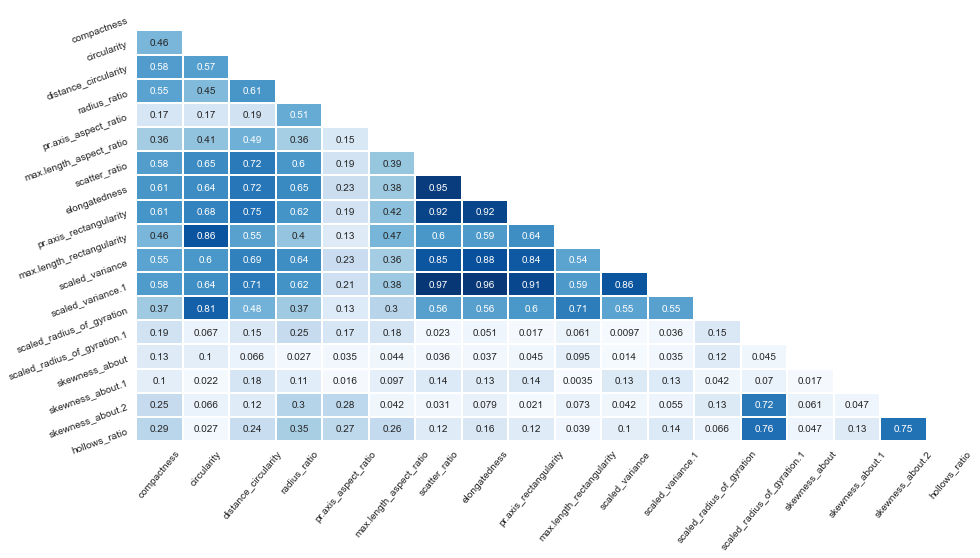

In [121]:
corr = abs(df_scaled.corr(method='kendall')) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

### Observations:

* From above correlation matrix we can see that there are many features which are highly correlated. 
* If we observe scaled_variance.1 is highly corelated with scatter_ratio and elongatedness.
* Elongatedness is highly corelated with scatter_ration.
* pr.axis_aspect_ratio is highly corelated with scatter_ratio and elongatedness.
* scaled_radius_of_gyration.1, skewness_about, skewness_about.1 are very low corelated to any other attributes.
* There are lot of dimensions with correlation above + 0.7 and it is difficult to determine which dimensions to drop manually.
* We will use PCA to determine it.

# Q3.Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [122]:
#Split into Train -Test set
df_train, df_test= train_test_split(df_scaled, test_size=0.3, random_state=123)
df_train.shape, df_test.shape

((592, 19), (254, 19))

In [123]:
# Divide train and test set into feature and target sets
X_train=df_train.drop(labels='class', axis=1)
y_train=df_train['class']
X_test=df_test.drop(labels='class', axis=1)
y_test=df_test['class']
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((592, 18), (592,), (254, 18), (254,))

# Q4.Train a Support vector machine using the train set and get the accuracy on the test set 

In [124]:
# Building a Support Vector Machine on train data
# svc_model = SVC(gamma = 'auto', kernel= 'poly', degree=1) 
svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

In [125]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))

0.9763513513513513


In [126]:
# Calculate the acuracy on test dataseusing acuracy_score function of metrics
metrics.accuracy_score(y_pred,y_test)

0.9488188976377953

In [127]:
# Distribution of the test data group by class variable
y_test.value_counts()

car    126
bus     67
van     61
Name: class, dtype: int64

In [128]:
# Confusion Matrix
cm2 = confusion_matrix(pd.array(y_test), y_pred, labels=[ "car","bus", "van"])
cm2

array([[121,   1,   4],
       [  0,  64,   3],
       [  4,   1,  56]], dtype=int64)

###### __Note__:
* Looking at the confusion matrix, model predicts cars with acuracy of 121/126 (96.03%), buses with accuracy 64/67 (95.52%) and vans with accuracy of 56/61 (91.80%)

# Q5.Perform K-fold cross validation and get the cross validation score of the model 

In [129]:
# K-fold cross validation using svc_model

num_folds = 10
seed = 7

X = df_scaled.drop(labels='class', axis=1)
Y = df_scaled['class']

kfold = KFold(n_splits=num_folds, random_state=seed)
svc_kfold = SVC()
results = cross_val_score(svc_kfold,X,Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % ((results.mean()*100.0 -(1.96 * results.std()*100.0)),(results.mean()*100.0 +(1.96 * results.std()*100.0))))

[0.94117647 0.97647059 0.95294118 1.         0.97647059 0.97647059
 0.97619048 0.95238095 0.95238095 0.96428571]
Accuracy: 96.688% (1.656%)
95 Percent Confidence Accuracy Range is Between: 93.442%  and 99.933%


__Note__: We can observe some growth in the accuracy percent using K-fold cross validation

# Q6.Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [130]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [131]:
# Create a covariance matrix for identifying Principal components
cov_matrix = np.cov(df_scaled.drop(labels='class', axis=1).T)
print('Covariance Matrix \n%s', cov_matrix)
print(cov_matrix.shape)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.11883518  0.32215538
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.25335943  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.17136843  0.42344682
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.06556514  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.19061302  0.5003507
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22461073  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.69148197  0.50590025
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.21279401  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.11883518  0.17136843  0.19061302  0.69148197  1.00118343  0.42604813
   0.12772029

In [132]:
#Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.73416309e-01  1.06314695e-01  1.90150244e-01  8.23330920e-02
   2.19593337e-02  8.32660622e-02  3.77138824e-01  6.71150521e-01
  -4.08262016e-01 -2.60756479e-01 -7.08046356e-03  1.56087759e-02
  -1.76410515e-01 -1.04846691e-02 -1.82045632e-02 -1.46565296e-03
   6.60556837e-02  4.42748752e-03]
 [-2.90980733e-01 -1.28033063e-01 -3.19829390e-02  1.89799889e-01
   3.53100907e-02 -1.76899446e-01 -3.76447804e-01  1.44063559e-01
  -3.37513618e-02  9.99970023e-02 -4.55692546e-02 -2.37084619e-01
   7.07026646e-02 -9.89450903e-03 -2.88655156e-01  6.97752540e-02
   5.30095291e-02  7.08069188e-01]
 [-3.03789852e-01  6.14522948e-02  7.00751665e-02 -6.28383379e-02
  -6.93513465e-02 -1.27273263e-01  8.10382121e-02 -3.54570068e-01
  -1.90858587e-01 -2.08831093e-01 -7.67302587e-01  6.77087429e-02
   3.51358461e-02  9.58261533e-03  2.19384219e-01 -1.70236371e-02
  -1.08704296e-01  8.27258178e-02]
 [-2.66471133e-01  1.95759024e-01 -2.83120155e-01 -7.66534534e-02
   3.60708047e-02  

In [133]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1         2         3         4         5         6   \
0  9.544589  3.147225  1.447497  1.184477  0.890851  0.744003  0.362709   

         7         8         9         10        11        12        13  \
0  0.226878  0.148709  0.091897  0.064383  0.047222  0.038897  0.002956   

         14       15        16        17  
0  0.030434  0.01003  0.018412  0.020134

In [134]:
#Find variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.96281801  70.42673225  78.45887765  85.03152534  89.97484489
  94.10330768  96.11597837  97.37492332  98.20010674  98.71004409
  99.06730375  99.32933792  99.54517437  99.71405039  99.82577178
  99.92794033  99.98359527 100.        ]


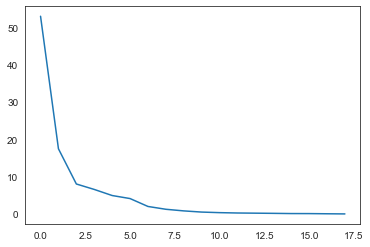

In [135]:
plt.plot(var_exp)

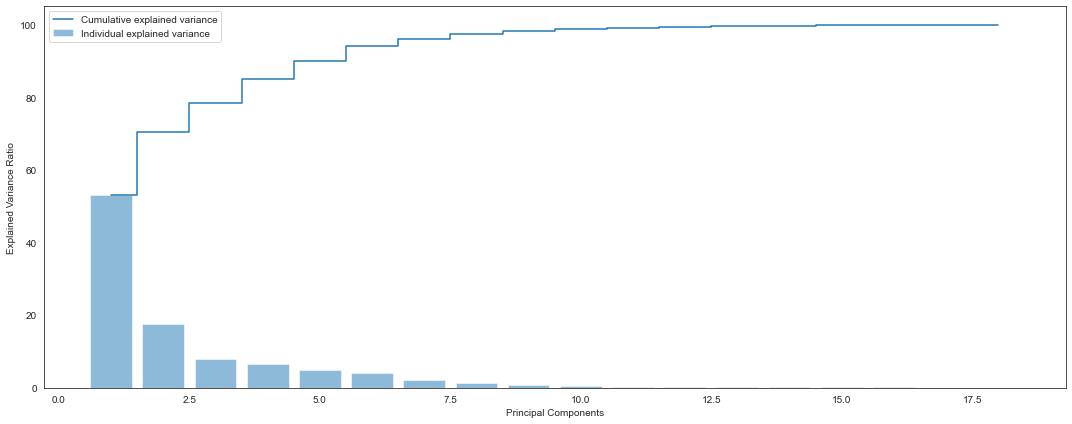

In [136]:
# Ploting 
plt.figure(figsize=(15 , 6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Observation:

First 7 principal components explain more than 96.11% of the variance in the data.



In [137]:
# Use PCA command from sklearn and find Principal Components. Transform data to components formed
# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 18 to 7)
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(df_scaled.drop(labels='class', axis=1))
data_reduced.transpose()
print(data_reduced.shape)
print(data_reduced)

(846, 7)
[[ 0.43112905 -0.41922315  1.32026841 ...  0.57498705 -0.37438299
  -0.88760496]
 [-1.53915916 -0.41005679 -0.45267359 ...  0.8460609  -0.57506262
   0.30422324]
 [ 3.82362197  0.20145606  0.18750606 ...  0.59209284  0.81594651
   0.40239379]
 ...
 [ 4.9045969  -0.0711846   0.93146178 ... -0.99624922 -0.73719856
   0.58256594]
 [-3.29394476 -1.02592993 -0.51483639 ...  0.1677371  -0.4946004
  -0.28011465]
 [-4.89151098  0.45525942 -0.74775261 ... -0.18008743 -0.18305611
  -0.25916156]]


In [138]:
print(pca.explained_variance_)

[9.54458926 3.14722469 1.44749716 1.18447667 0.89085053 0.74400274
 0.36270946]


In [139]:
print(pca.components_.shape)
pca.components_

(7, 18)


array([[ 2.73416309e-01,  2.90980733e-01,  3.03789852e-01,
         2.66471133e-01,  8.78905702e-02,  1.54541772e-01,
         3.13772115e-01, -3.11549809e-01,  3.10544646e-01,
         2.81469315e-01,  3.05274038e-01,  3.10083591e-01,
         2.68535950e-01, -2.58025013e-02,  4.13249806e-02,
         5.83291476e-02,  3.29348308e-02,  7.85834885e-02],
       [-1.06314695e-01,  1.28033063e-01, -6.14522948e-02,
        -1.95759024e-01, -1.99376391e-01, -1.02976678e-01,
         6.35601568e-02, -1.12702351e-03,  7.57943138e-02,
         1.16495877e-01,  6.74884255e-02,  7.06401986e-02,
         2.11102482e-01,  4.82584328e-01, -4.72274060e-02,
        -1.10524491e-01, -5.23815095e-01, -5.29782415e-01],
       [-1.90150244e-01,  3.19829390e-02, -7.00751665e-02,
         2.83120155e-01,  6.75658252e-01,  4.31373585e-01,
        -1.11332839e-01,  5.50548499e-02, -1.28271917e-01,
         3.67923272e-02,  3.35925004e-02, -1.29279190e-01,
         2.72827776e-02,  2.79375722e-01, -2.27809647e

In [140]:
# Find correlation between components and features
df_comp = pd.DataFrame(pca.components_,columns=list(X_train))
df_comp

compactness  circularity  distance_circularity  radius_ratio  \
0     0.273416     0.290981              0.303790      0.266471   
1    -0.106315     0.128033             -0.061452     -0.195759   
2    -0.190150     0.031983             -0.070075      0.283120   
3     0.082333     0.189800             -0.062838     -0.076653   
4    -0.021959    -0.035310              0.069351     -0.036071   
5     0.083266    -0.176899             -0.127273      0.265249   
6     0.377139    -0.376448              0.081038      0.019815   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.087891                 0.154542       0.313772   
1             -0.199376                -0.102977       0.063560   
2              0.675658                 0.431374      -0.111333   
3             -0.018615                 0.061799      -0.093738   
4              0.007273                 0.445001      -0.062208   
5              0.375199                -0.548904       0.060637   
6             -0.222527                 0.393147       0.088929   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.311550                0.310545                   0.281469   
1      -0.001127                0.075794                   0.116496   
2       0.055055               -0.128272                   0.036792   
3       0.086314               -0.088410                   0.196769   
4       0.109362               -0.047039                   0.028995   
5      -0.069272                0.049615                  -0.315343   
6      -0.060306                0.100304                  -0.296868   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.305274           0.310084                   0.268536   
1         0.067488           0.070640                   0.211102   
2         0.033593          -0.129279                   0.027283   
3        -0.131100          -0.090650                   0.199034   
4        -0.045315          -0.084833                  -0.052306   
5         0.175819           0.094273                  -0.028998   
6         0.192915           0.099310                  -0.433500   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.025803        0.041325          0.058329   
1                     0.482584       -0.047227         -0.110524   
2                     0.279376       -0.227810         -0.217966   
3                    -0.085072        0.623597         -0.640087   
4                     0.138061        0.589369          0.601267   
5                     0.254839        0.410327          0.068277   
6                     0.165298        0.029337         -0.348029   

   skewness_about.2  hollows_ratio  
0          0.032935       0.078583  
1         -0.523815      -0.529782  
2         -0.073593      -0.021513  
3          0.087923       0.043184  
4         -0.187813      -0.000573  
5          0.135129      -0.160920  
6         -0.030811      -0.100079

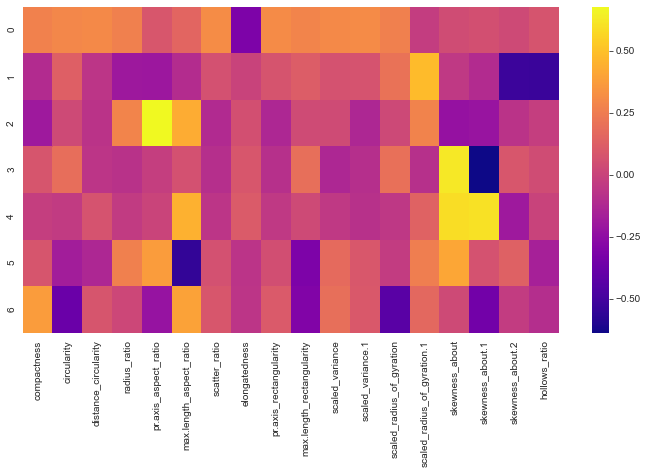

In [141]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

__Note__: 
- This heatmap and the color bar basically represent the correlation between the various features and the principal component itself.
- Component 3 looks more related to skewness_about.1

# Q7.Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state)

In [142]:
print(df_scaled.shape)
df_scaled.head()

(846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.449217                 0.669362      -0.207598   
1             -0.647775                 0.352541      -0.599423   
2              0.668179                 0.669362       1.148719   
3              0.250602                 0.352541      -0.750125   
4              4.663290                 5.626910      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.306641       -0.073812          0.380870   
1                    -0.013736        0.538390          0.156798   
2                     0.129679        1.558727         -0.403383   
3                    -1.402119       -0.073812         -0.291347   
4                     5.887022        0.538390         -0.179311   

   skewness_about.2  hollows_ratio class  
0         -0.312012       0.183957   van  
1          0.013265       0.452977   van  
2         -0.149374       0.049447   car  
3          1.639649       1.529056   van  
4         -1.450481      -1.699181   bus

In [143]:
##Transform original dataframe to Principal Data Components
df_scaled_pca = pd.DataFrame(pca.transform(df_scaled.drop(labels='class', axis=1)))
print(df_scaled_pca.shape)
df_scaled_pca['class']=df_scaled['class']
df_scaled_pca.head()

(846, 7)


0         1         2         3         4         5         6 class
0  0.431129 -0.419223  1.320268  0.158997  0.574987 -0.374383 -0.887605   van
1 -1.539159 -0.410057 -0.452674  0.321416  0.846061 -0.575063  0.304223   van
2  3.823622  0.201456  0.187506  1.192197  0.592093  0.815947  0.402394   car
3 -1.643614 -2.967192 -0.021391  0.392134 -0.211237 -0.705251  0.265702   van
4  0.486981  2.952724  8.153736 -0.115458  3.841865  0.973512  2.069427   bus

In [144]:
#Split into Principal component data to Train -Test set
df_train_pca, df_test_pca= train_test_split(df_scaled_pca, test_size=0.3, random_state=123)
df_train_pca.shape, df_test_pca.shape

((592, 8), (254, 8))

In [145]:
# Divide train and test set into feature and target sets
X_train_pca=df_train_pca.drop(labels='class', axis=1)
y_train_pca=df_train_pca['class']
X_test_pca=df_test_pca.drop(labels='class', axis=1)
y_test_pca=df_test_pca['class']
X_train_pca.shape,y_train_pca.shape, X_test_pca.shape, y_test_pca.shape

((592, 7), (592,), (254, 7), (254,))

In [146]:
# Building a Support Vector Machine on train data
# svc_model_pca = SVC(gamma = 'auto', kernel= 'poly', degree=1) 
svc_model_pca = SVC()
svc_model_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = svc_model_pca.predict(X_test_pca)

In [147]:
# check the accuracy on the training set
print(svc_model_pca.score(X_train_pca, y_train_pca))

0.9577702702702703


In [148]:
# Calculate the acuracy on test dataseusing acuracy_score function of metrics
metrics.accuracy_score(y_pred_pca,y_test_pca)

0.9212598425196851

In [149]:
# Distribution of the test data group by class variable
y_test_pca.value_counts()

car    126
bus     67
van     61
Name: class, dtype: int64

In [150]:
# Confusion Matrix
cm2 = confusion_matrix(pd.array(y_test_pca), y_pred_pca, labels=[ "car","bus", "van"])
cm2

array([[118,   1,   7],
       [  4,  62,   1],
       [  5,   2,  54]], dtype=int64)

In [151]:
# K-fold cross validation using svc_model
num_folds = 10
seed = 7

X = df_scaled_pca.drop(labels='class', axis=1)
Y = df_scaled_pca['class']

kfold_pca = KFold(n_splits=num_folds, random_state=seed)
svc_pca_kfold = SVC()
results_pca = cross_val_score(svc_pca_kfold,X,Y, cv=kfold_pca)
print(results_pca)
print("Accuracy: %.3f%% (%.3f%%)" % (results_pca.mean()*100.0, results_pca.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % ((results_pca.mean()*100.0 -(1.96 * results_pca.std()*100.0)),(results_pca.mean()*100.0 +(1.96 * results_pca.std()*100.0))))

[0.92941176 0.94117647 0.95294118 0.89411765 0.90588235 0.94117647
 0.94047619 0.9047619  0.96428571 0.89285714]
Accuracy: 92.671% (2.416%)
95 Percent Confidence Accuracy Range is Between: 87.935%  and 97.407%


# Q8.Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

In [152]:
# Comparing the accuracy scores of train and test test data for both original and PCA data
print("Original Trained  data accuracy = ", svc_model.score(X_train, y_train))
print("PCA Trained  data accuracy = ",svc_model_pca.score(X_train_pca, y_train_pca))
print("-----")
print("Original test  data accuracy = ",metrics.accuracy_score(y_pred,y_test))
print("PCA test  data accuracy = ",metrics.accuracy_score(y_pred_pca,y_test_pca))
print("-----")
print("Original data cross validation score = ",results.mean()*100.0)
print("PCA data cross validation score = ",results_pca.mean()*100.0)
print("Original Data 95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % ((results.mean()*100.0 -(1.96 * results.std()*100.0)),(results.mean()*100.0 +(1.96 * results.std()*100.0))))
print("PCA Data 95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % ((results_pca.mean()*100.0 -(1.96 * results_pca.std()*100.0)),(results_pca.mean()*100.0 +(1.96 * results_pca.std()*100.0))))

Original Trained  data accuracy =  0.9763513513513513
PCA Trained  data accuracy =  0.9577702702702703
-----
Original test  data accuracy =  0.9488188976377953
PCA test  data accuracy =  0.9212598425196851
-----
Original data cross validation score =  96.687675070028
PCA data cross validation score =  92.67086834733892
Original Data 95 Percent Confidence Accuracy Range is Between: 93.442%  and 99.933%
PCA Data 95 Percent Confidence Accuracy Range is Between: 87.935%  and 97.407%


## Conclusion:

* From above we can see that PCA is doing a very good job.
* Accuracy with pca is approx 92.13% and with original data is approx 94.88%, but note that pca 92% accuracy is with only 7 dimensions where as original data has 18 dimensions. Means acuracy is reduced just by 2.5 percent with the Reduction of 11 dimensions. 
* But every thing has two sides, disadvantage of pca is we cannot do interpretation with the model. it's blackbox.

* Considering the K-Fold cross validation score for original data it is 96.69% where as it is 92.67% for PCA data with same number of 10 folds. This means in production the range of accuracy with 95% confidence is between 93.442%  and 99.933% with original data. For PCA data the 95% confidence accuracy range is between 87.935%  and 97.407%.